In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases

%matplotlib inline

# create a set of all available encodings
alias_values = set(aliases.values())

for enconding in set(aliases.values()):
    try:
        pd.read_csv('../data/ext-ciclovias.csv', encoding=enconding) # read only first 10 rows to save time
        print('Succeful: ', enconding)
    except:
        pass

Succeful:  cp500
Succeful:  cp1026
Succeful:  cp037
Succeful:  cp273
Succeful:  cp1140


In [28]:
# List all datasets
def get_all_datasets():
    url = "https://opendata.urbanplatform.portodigital.pt/api/3/action/package_list"
    r = requests.get(url)
    return r.json()["result"]

print(get_all_datasets())

['agua-de-nascente', 'alojamento-local', 'alojamentos-hoteleiros-2011', 'areas-edificadas', 'areas-verdes', 'atlas-desportivo', 'bairros-de-casas-economicas-do-estado-novo', 'balizas-de-sinalizacao', 'bicicletarios', 'carta-de-patrimonio', 'cemiterios-municipais-ou-privados-2007', 'centros-de-saude-e-extensoes-2001', 'ciclovias', 'correios-2013', 'dissuasores-de-controlo-de-acessos', 'ecocentros-2006', 'edificios-de-interesse-publico', 'edificios-de-interesse-publico-2012', 'eixos-de-via-infraestruturas-portugal', 'envolvente', 'equipamentos-de-recolha-contentores-cinzentos_-cones_recolha-de-objectos-fora-de-uso_-reee-e-vidroes', 'equipamentos-de-saude', 'espacos-verdes-com-valor-patrimonial-2012', 'estabelecimentos-de-bebidas-e-restauracao-da-movida-2012', 'estabelecimentos-de-ensino-por-ano-letivo', 'estabelecimentos-de-ensino-superior-por-ano-letivo', 'feiras-e-mercados-2011', 'fontes-de-contaminacao-cemiterios-carta-de-ocupacao-de-superficie', 'fontes-de-contaminacao-cemiterios-car

In [31]:
def get_dataset_info(dataset, url_only=True):
    # returns a generator for (dataset-resource, FORMAT, URL) or just the URL
    url = "https://opendata.urbanplatform.portodigital.pt/api/3/action/package_show?id=%s" % dataset
    j = requests.get(url).json()
    if not j["success"]:
        print(j["error"])
        return
    for resource in j['result']['resources']:
        if url_only:
            yield resource["url"]
        else:
            yield (resource["name"], resource["format"], resource["url"])

print(list(get_dataset_info("agua-de-nascente")))

['https://servsig.cm-porto.pt/arcgis/rest/services/OpenData_APD/OpenData_APD/MapServer/83']


In [153]:
import pandas as pd

# Assuming your CSV file is named 'data.csv'
file_path = "../data/ext-ciclovias.csv"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path, sep=";")

# Display specific columns (replace 'column_names' with the names of columns you want to display)
print(data.columns)



Index([''toponimo','denominacao','pavimento','largura','estado','objectid','globalid','esriGeometryPolyline''], dtype='object')


In [156]:
import pandas as pd

# Assuming your CSV file is named 'data.csv'
file_path = "../data/ext-ciclovias.csv"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path, sep=";")

# Remove extra quotes from column names
data.columns = data.columns.str.strip("'")

# Access the 'toponimo' column using iloc
toponimo_column = data.iloc[:, 0]  # Assuming 'toponimo' is the first column (index 0)

# Display the 'toponimo' column
print(toponimo_column)


0      '','Ciclovia Asprela','Betão betuminoso',0.0,'...
1      'Rua do Dr. Roberto Frias','Ciclovia Asprela',...
2      'Avenida das Congostas','Ciclovia Prelada','Be...
3      'Rua de Gonçalo Sampaio','Ligação entre Pólos ...
4      '','','',0.0,'Planeado',645,'{1B24C198-B060-46...
5      '','','',0.0,'Planeado',641,'{999C6FF2-FFB7-4F...
6      '','','',0.0,'Planeado',625,'{ABB5279E-4332-4E...
7      '','','',0.0,'Planeado',662,'{5DD9B5B5-4DBB-43...
8      '','','',0.0,'Planeado',649,'{F958769C-0C74-47...
9      '','','',0.0,'Planeado',650,'{E8CE17F0-555E-40...
10     '','','',0.0,'Planeado',606,'{001DE276-2084-4E...
11     '','','',0.0,'Planeado',617,'{41D0F85A-C750-4F...
12     '','','',0.0,'Planeado',651,'{A20E420D-90AF-4A...
13     '','','',0.0,'Planeado',618,'{CA2F6512-DC29-45...
14     '','','',0.0,'Planeado',652,'{D9960912-78AF-4B...
15     '','','',0.0,'Planeado',653,'{C4BD846E-C62B-4F...
16     '','','',0.0,'Planeado',654,'{978FC746-EE7D-4B...
17     '','','',0.0,'Planeado',

,toponimo,denominacao,pavimento,largura,estado,objectid,globalid
0,,ciclovia asprela,betão betuminoso,0.0,executado,528,{bd4f828c-ccd0-4766-a27e-3b8757286a41}
1,rua do dr. roberto frias,ciclovia asprela,betão betuminoso,1.1,executado,437,{d0c2b68a-a0fb-46b1-9306-f851e9cc13f4}
2,avenida das congostas,ciclovia prelada,betão betuminoso,3.0,executado,376,{ee649016-3b74-4946-b488-e6198b961428}
3,rua de gonçalo sampaio,ligação entre pólos universitários,betão betuminoso,3.0,executado,502,{dae233da-9877-41b5-9098-7ac5aae384bf}
4,,,,0.0,planeado,645,{1b24c198-b060-46c6-a186-41d0d544299d}
...,...,...,...,...,...,...,...
350,,,,0.0,planeado,633,{89cc596a-347a-495a-9549-87ad15664a82}
351,,parque da cidade,saibro / terra batida,3.5,executado,578,{63b8fecb-6bf0-4a56-bb28-fc51b7ae749d}
352,escadas garcia de orta,ciclovia parque cidade - fluvial,múltiplo,2.7,executado,570,{d00aea80-c355-48c9-bc0c-6ac26506c77f}
353,,parque pasteleira,múltiplo,2.5,executado,568,{c6cc50ee-cf2a-4e7a-a447-82b67bcb77dc}


float64
toponimo        object
denominacao     object
pavimento       object
largura        float64
estado          object
                ...   
_82             object
_83             object
_84             object
_85             object
_86             object
Length: 95, dtype: object


<Axes: xlabel='largura'>

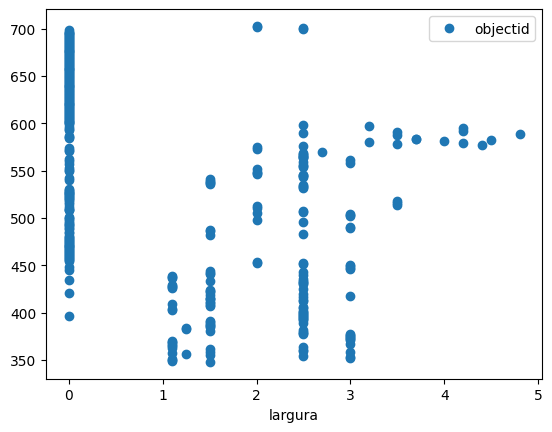

In [67]:
import pandas as pd

# Assuming your CSV file is named 'data.csv'
file_path = "../data/ext-ciclovias-formated.csv"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path, sep=";", encoding="utf-8")

# remove ' from title column
data.columns = data.columns.str.strip("'")

# remove ' from all values
data = data.apply(lambda x: x.str.strip("'") if x.dtype == "object" else x)

# turn all values to lower case
data = data.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

# turn objectid to int
data['objectid'] = data['objectid'].astype(int)

# print more than one column toponimo','denominacao','pavimento','largura','estado','objectid','globalid','esriGeometryPolyline
display(data[['toponimo', 'denominacao', 'pavimento',
        'largura', 'estado', 'objectid', 'globalid']])

# print data type from largura
print(data['largura'].dtype)

# print values types
print(data.dtypes)

# create a graph from data
data.plot(x='largura', y='objectid', style='o')

In [119]:
import requests
import pandas as pd

url = "https://opendata.porto.digital/dataset/d23a2bca-ffe5-43d0-954a-7b5e90167289/resource/61961146-c116-4b40-83e1-f4391c6cb485/download/ext-ciclovias.csv"

# read all columns minus the last one
data = pd.read_csv(url, sep=";")

# print
display(data)

,"'toponimo','denominacao','pavimento','largura','estado','objectid','globalid','esriGeometryPolyline'"
0,"'','Ciclovia Asprela','Betão betuminoso',0.0,'..."
1,"'Rua do Dr. Roberto Frias','Ciclovia Asprela',..."
2,"'Avenida das Congostas','Ciclovia Prelada','Be..."
3,"'Rua de Gonçalo Sampaio','Ligação entre Pólos ..."
4,"'','','',0.0,'Planeado',645,'{1B24C198-B060-46..."
...,...
350,"'','','',0.0,'Planeado',633,'{89CC596A-347A-49..."
351,"'','Parque da Cidade','Saibro / terra batida',..."
352,"'Escadas Garcia de Orta','Ciclovia Parque Cida..."
353,"'','Parque Pasteleira','Múltiplo',2.5,'Executa..."
